In [15]:
%pip install pvlib

     ---------------------------------------- 0.0/29.4 MB ? eta -:--:--
      --------------------------------------- 0.4/29.4 MB 8.3 MB/s eta 0:00:04
     - -------------------------------------- 1.4/29.4 MB 14.9 MB/s eta 0:00:02
     --- ------------------------------------ 2.9/29.4 MB 20.7 MB/s eta 0:00:02
     ----- ---------------------------------- 4.3/29.4 MB 22.8 MB/s eta 0:00:02
     -------- ------------------------------- 6.1/29.4 MB 25.8 MB/s eta 0:00:01
     --------- ------------------------------ 7.2/29.4 MB 27.2 MB/s eta 0:00:01
     ----------- ---------------------------- 8.7/29.4 MB 26.6 MB/s eta 0:00:01
     ------------- ------------------------- 10.3/29.4 MB 28.5 MB/s eta 0:00:01
     ---------------- ---------------------- 12.3/29.4 MB 32.8 MB/s eta 0:00:01
     ------------------- ------------------- 14.4/29.4 MB 36.4 MB/s eta 0:00:01
     --------------------- ----------------- 16.2/29.4 MB 38.6 MB/s eta 0:00:01
     ------------------------ -------------- 18.2

In [4]:
import pandas as pd
import numpy as np
import pvlib
import math
from datetime import datetime
import csv
import matplotlib
import matplotlib.pyplot as plt

In [5]:
pd.read_csv('PER10min2009_2022_RS_H.csv')


C:\Users\T.C\AppData\Local\Temp\ipykernel_14140\1253223098.py:1: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('PER10min2009_2022_RS_H.csv')


,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg
0,2009-01-01 00:00:00,NaN,17.19,0.0
1,2009-01-01 00:10:00,NaN,15.89,0.0
2,2009-01-01 00:20:00,NaN,14.61,0.0
3,2009-01-01 00:30:00,NaN,14.95,0.0
4,2009-01-01 00:40:00,NaN,13.18,0.0
...,...,...,...,...
730242,2022-12-31 23:10:00,0.0,53.41,0.0
730243,2022-12-31 23:20:00,0.0,51.99,0.0
730244,2022-12-31 23:30:00,0.0,51.62,0.0
730245,2022-12-31 23:40:00,0.0,48.46,0.0


In [6]:


# Load CSV file into pandas DataFrame
df = pd.read_csv('PER10min2009_2022_RS_H.csv')

# Convert datetime column to pandas datetime format
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

# Define location coordinates (latitude, longitude, altitude)
location = pvlib.location.Location(latitude=42.48,
                                    longitude=1.61,
                                    altitude=2415)

# Calculate solar position for each datetime in DataFrame
solar_position = pvlib.solarposition.get_solarposition(df['TIMESTAMP'],location.latitude,location.longitude)

# Calculate solar zenith angle for each datetime in DataFrame
zenith_angles = 90 - solar_position['elevation']
print(zenith_angles)



df = df.reset_index()
# Add solar zenith angle column to DataFrame
zenith_angles = zenith_angles.reset_index(drop=True)


df['zenith_angle_deg']= zenith_angles

# Save DataFrame with solar zenith angle as a new CSV file
df.to_csv('output_file.csv', index=False)

"""
# Add solar zenith angle column to DataFrame
df.insert(3,'zenith_angle_deg', zenith_angles, True)
#df[] = zenith_angles

# Save DataFrame with solar zenith angle as a new CSV file
df.to_csv('output_file.csv', index=False)"""

C:\Users\T.C\AppData\Local\Temp\ipykernel_14140\3866653550.py:2: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PER10min2009_2022_RS_H.csv')


TIMESTAMP
2009-01-01 00:00:00    160.519214
2009-01-01 00:10:00    160.341724
2009-01-01 00:20:00    159.949193
2009-01-01 00:30:00    159.354097
2009-01-01 00:40:00    158.573632
                          ...    
2022-12-31 23:10:00    158.271643
2022-12-31 23:20:00    159.116401
2022-12-31 23:30:00    159.782794
2022-12-31 23:40:00    160.252351
2022-12-31 23:50:00    160.510558
Name: elevation, Length: 730247, dtype: float64


"\n# Add solar zenith angle column to DataFrame\ndf.insert(3,'zenith_angle_deg', zenith_angles, True)\n#df[] = zenith_angles\n\n# Save DataFrame with solar zenith angle as a new CSV file\ndf.to_csv('output_file.csv', index=False)"

In [7]:
pd.read_csv('RS_newFile2.txt')

,Date Time RS_Avg doy height SZA RS
0,yyyy-mm-dd hh:mm:ss W/m2 doy deg deg W/m2
1,1 2009-01-01 00:00:00 0.00 1 -70.53 160.53 NA
2,2 2009-01-01 00:10:00 0.00 1 -70.35 160.35 NA
3,3 2009-01-01 00:20:00 0.00 1 -69.96 159.96 NA
4,4 2009-01-01 00:30:00 0.00 1 -69.37 159.37 NA
...,...
730243,730243 2022-12-31 23:10:00 0.00 365 -68.27 158...
730244,730244 2022-12-31 23:20:00 0.00 365 -69.11 159...
730245,730245 2022-12-31 23:30:00 0.00 365 -69.78 159...
730246,730246 2022-12-31 23:40:00 0.00 365 -70.25 160...


In [8]:

data = csv.reader(open('RS_newFile2.txt', 'r'), delimiter=" ", quotechar='|')
column4,column5,column6,column7 = [],[],[], []

for row in data:
    column4.extend([row[4]])
    column5.extend([row[5]])
    column6.extend([row[6]])
    column7.extend([row[3]])

In [9]:
print(len(column7),len(column6),len(column4))

730249 730249 730249


In [10]:
col4,col5,col6,col7 = column4,column5,column6,column7
del col4[:2],col5[0],col6[:2],col7[:2]

In [13]:
print(len(col7),len(col6),len(col4))

730247 730247 730247


In [14]:
col6

['160.53',
 '160.35',
 '159.96',
 '159.37',
 '158.59',
 '157.65',
 '156.55',
 '155.34',
 '154.02',
 '152.60',
 '151.11',
 '149.56',
 '147.95',
 '146.29',
 '144.60',
 '142.87',
 '141.12',
 '139.35',
 '137.55',
 '135.75',
 '133.93',
 '132.10',
 '130.27',
 '128.43',
 '126.58',
 '124.74',
 '122.90',
 '121.05',
 '119.22',
 '117.38',
 '115.56',
 '113.74',
 '111.93',
 '110.13',
 '108.34',
 '106.56',
 '104.80',
 '103.05',
 '101.32',
 '99.61',
 '97.91',
 '96.24',
 '94.59',
 '92.96',
 '91.36',
 '89.78',
 '88.24',
 '86.72',
 '85.24',
 '83.79',
 '82.38',
 '81.01',
 '79.68',
 '78.39',
 '77.15',
 '75.96',
 '74.82',
 '73.73',
 '72.70',
 '71.73',
 '70.82',
 '69.97',
 '69.18',
 '68.47',
 '67.83',
 '67.26',
 '66.76',
 '66.34',
 '66.00',
 '65.74',
 '65.56',
 '65.46',
 '65.44',
 '65.50',
 '65.64',
 '65.87',
 '66.17',
 '66.55',
 '67.01',
 '67.54',
 '68.15',
 '68.83',
 '69.58',
 '70.40',
 '71.28',
 '72.23',
 '73.23',
 '74.29',
 '75.41',
 '76.57',
 '77.79',
 '79.06',
 '80.37',
 '81.72',
 '83.11',
 '84.54',
 

In [17]:
col7 =np.array(col6)
col7 = col7.astype(float) #sza


In [18]:
col6 =np.array(col6)
col6 = col6.astype(float) #sza

col4 = np.array(col4)
#print(col4[:15])
#print(float('1.0'))

col4 =col4.astype(float)
col4 #doy





array([  1.,   1.,   1., ..., 365., 365., 365.])

In [17]:
print(len(col7),len(col6),len(col4))

730247 730247 730247


In [18]:
print(type(col6[0]),col7[1])

<class 'numpy.float64'> 160.35


In [19]:
print(col6)

[160.53 160.35 159.96 ... 159.78 160.25 160.52]


In [20]:

df = pd.read_csv('output_file.csv')#, parse_dates = ['TIMESTAMP'], index_col='TIMESTAMP')

df['TIMESTAMP'] =  pd.to_datetime(df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')

C:\Users\T.C\AppData\Local\Temp\ipykernel_9356\916400007.py:1: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('output_file.csv')#, parse_dates = ['TIMESTAMP'], index_col='TIMESTAMP')


In [21]:
#df['DOY'] = floatd(df['TIMESTAMP'].dt.dayofyear)

#df.to_csv('output_file.csv', index=False)

In [22]:
def func_cos(sza):
    cosinus = np.cos(sza)
    return cosinus

In [23]:
col6[col6 > 87] = np.nan
cosinus=func_cos(col6)

In [24]:
cosinus[:100]

array([        nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,  0.32044766, -0.91430878, -0.51224322,
        0.76574913,  0.78294592, -0.41742762, -0.98879851, -0.17999364,
        0.84631022,  0.83743479, -0.0972733 , -0.90331156, -0.8645053 ,
       -0.13376315,  0.65624747,  0.99789074,  0.79907669,  0.28188474,
       -0.28043   , -0.70628881, -0.93356784, -0.99964746, -0.97

In [25]:
def func_terme_rho(day):
    gamma = 2*np.pi*(day-1)/365
    E0 = 1.000110 + 0.034221*np.cos(gamma) + 0.001280*np.sin(gamma) +\
    0.000719*np.cos(2*gamma) + 0.000077*np.sin(2*gamma)
    rho = E0**-2
    
    return rho

In [26]:
ro= func_terme_rho(col4)
ro

array([0.93342051, 0.93342051, 0.93342051, ..., 0.93347495, 0.93347495,
       0.93347495])

In [27]:
I0 = ro*cosinus*1367

In [28]:
I0[50:100]

array([  977.08504262,   999.02791184,  -532.63172891, -1261.69289444,
        -229.66933783,  1079.87985946,  1068.5549375 ,  -124.11935469,
       -1152.61275438, -1103.09651729,  -170.67988945,   837.36247837,
        1273.29444953,  1019.61054592,   359.68094197,  -357.82470569,
        -901.21452709, -1191.21933994, -1275.53599957, -1241.37481217,
       -1168.4736762 , -1111.45666032, -1098.70039719, -1135.63055853,
       -1205.70475281, -1269.16475295, -1251.41713951, -1069.71765183,
        -649.71776838,    -5.41278228,   726.52761455,  1224.50091125,
        1140.52562077,   359.77491125,  -714.31894692, -1275.53339534,
        -717.76412945,   569.41105014,  1275.89736393,   495.74031215,
        -933.78436138, -1107.20852413,   327.27560357,  1275.03581764,
         180.84102872, -1225.22915026,  -489.59378288,            nan,
                  nan,            nan])

In [29]:
print(len(col7))
print(len(I0))

730247
730247


In [30]:
KT=col7[:-1]/I0

ValueError: operands could not be broadcast together with shapes (730246,) (730247,) 

In [31]:
col7[50:90]

array([82.38, 81.01, 79.68, 78.39, 77.15, 75.96, 74.82, 73.73, 72.7 ,
       71.73, 70.82, 69.97, 69.18, 68.47, 67.83, 67.26, 66.76, 66.34,
       66.  , 65.74, 65.56, 65.46, 65.44, 65.5 , 65.64, 65.87, 66.17,
       66.55, 67.01, 67.54, 68.15, 68.83, 69.58, 70.4 , 71.28, 72.23,
       73.23, 74.29, 75.41, 76.57])

In [32]:
KT[50:100]

NameError: name 'KT' is not defined

# RESULTATS TERRIBLES 5:00 ATURAR, comparar gràfiques 


# AQUI!!!!!!!!!!!!!!!!

In [41]:
def clearness_index(day,irradiance, solar_zenith_angle):
    solar_zenith_angle[solar_zenith_angle > 85] = np.nan
    gamma = 2*np.pi*(day-1)/(365)
    E0 = 1.000110 + 0.034221*np.cos(gamma) + 0.001280*np.sin(gamma) +\
    0.000719*np.cos(2*gamma) + 0.000077*np.sin(2*gamma)
    #rho = E0**-2
    rho = E0
    cos_theta = np.cos(np.radians(solar_zenith_angle))
    #cos_theta[cos_theta < 0] = np.nan
    k = irradiance / (1367*rho*cos_theta)
    return k

In [42]:
K = clearness_index(col4,col7,col6)

In [43]:
K

array([nan, nan, nan, ..., nan, nan, nan])

In [44]:
K[:100]

array([       nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan,        nan,
              nan,        nan,        nan,        nan, 0.54744943,
       0.43907693, 0.36639977, 0.31434983, 0.27529437, 0.24517292,
       0.22129199, 0.20194423, 0.18599526, 0.17278272, 0.16171115,
       0.15234978, 0.14437968, 0.13756015, 0.13186156, 0.12704008,
       0.12297628, 0.11957698, 0.11683349, 0.11468346, 0.11308031,
       0.11199058, 0.11139213, 0.11127303, 0.11163092, 0.11247

In [45]:
np.where(np.isfinite(K[:100]))

(array([49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65,
        66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82,
        83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95], dtype=int64),)

In [46]:
col7[49]

83.79

In [47]:
K[np.isfinite(K) == False] =np.nan

In [48]:
len(K[K<1])


336274

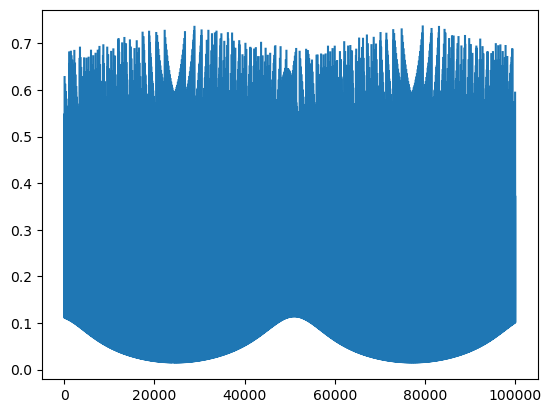

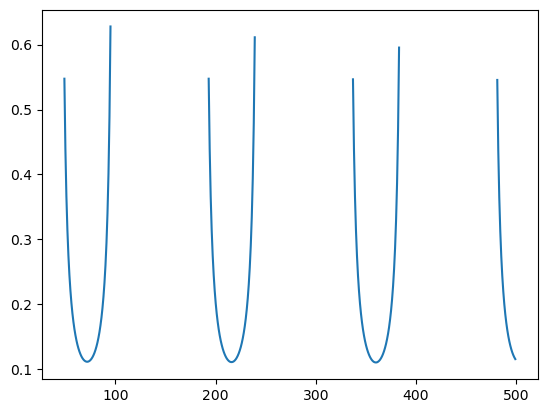

0.13555609626854664
0.1330137217439847


In [49]:
#plt.plot(np.arange(1,344573,1),K[K<1])
plt.plot(K[0:100000])
plt.show()
plt.plot(K[:500])
plt.show()

print(K[np.isfinite(K) == True].mean())
print(K[np.isfinite(K) == True].std())


In [40]:
len(col7)

730247

In [216]:
# Esperariem tenir enlloc de U , U invertida ,no?

# Multiplicar els dos termes i per la constant 1367 i dividir entre RS_Avg

# ------------------------------------------------------------------------------------------------

In [ ]:
index,TIMESTAMP,RS_Std,HumR1min_Avg,RS_Avg,zenith_angle_deg

In [47]:
# Read in the text file
df = pd.read_csv('output_file.csv', delimiter='\t', names=['index','TIMESTAMP','RS_Std','HumR1min_Avg', 'RS_Avg', 'solar_zenith_angle'])

# Convert datetime strings to datetime objects
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')

# Calculate the extraterrestrial radiation (ETR) using the solar zenith angle
df['ETR'] = np.where(df['solar_zenith_angle'] < 87, (np.sin(np.radians(df['solar_zenith_angle'])) + 
                         0.15*(93.885 - df['solar_zenith_angle'])**(-1.253)) / 
                         (np.sin(np.radians(90)) + 0.15*(93.885 - 90)**(-1.253)), 0)

# Calculate the clear sky radiation (CSR) using the ETR and the actual radiation
df['CSR'] = df['ETR'] * (0.75 + 2e-5 * df['RS_Avg'])

# Calculate the clearness index (CI)
df['CI'] = df['RS_Avg'] / df['CSR']

# Calculate the daily, hourly, and minute-level clearness index
df['day_CI'] = df.groupby(df['TIMESTAMP'].dt.date)['CI'].transform('mean')
df['hour_CI'] = df.groupby([df['TIMESTAMP'].dt.date, df['TIMESTAMP'].dt.hour])['CI'].transform('mean')
df['minute_CI'] = df['CI']

# Print the daily, hourly, and minute-level clearness index for the first 10 rows
print(df[['TIMESTAMP', 'day_CI', 'hour_CI', 'minute_CI']].head(100))

   TIMESTAMP  day_CI  hour_CI  minute_CI
0        NaT     NaN      NaN        NaN
1        NaT     NaN      NaN        NaN
2        NaT     NaN      NaN        NaN
3        NaT     NaN      NaN        NaN
4        NaT     NaN      NaN        NaN
..       ...     ...      ...        ...
95       NaT     NaN      NaN        NaN
96       NaT     NaN      NaN        NaN
97       NaT     NaN      NaN        NaN
98       NaT     NaN      NaN        NaN
99       NaT     NaN      NaN        NaN

[100 rows x 4 columns]


In [50]:

# Load CSV file into pandas DataFrame
df = pd.read_csv('PER10min2009_2022_RS_H.csv')

# Convert datetime column to pandas datetime format
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

# Define location coordinates (latitude, longitude, altitude)
location = pvlib.location.Location(latitude=42.48,
                                    longitude=1.61,
                                    altitude=2415)

# Calculate clear sky GHI for each datetime in DataFrame
clearsky = location.get_clearsky(df['TIMESTAMP'])
GHI_clear = clearsky['ghi']

# Calculate actual GHI for each datetime in DataFrame
solar_position = pvlib.solarposition.get_solarposition(df['TIMESTAMP'], 
                                                       location.latitude, 
                                                       location.longitude)
solis = pvlib.clearsky.simplified_solis(GHI_clear.index, location.latitude, location.longitude)
GHI = pvlib.irradiance.get_total_irradiance(surface_tilt=0, surface_azimuth=180, 
                                            dni=solis['dni'], ghi=GHI_clear, 
                                            dhi=clearsky['dhi'], 
                                            solar_zenith=solar_position['apparent_zenith'], 
                                            solar_azimuth=solar_position['azimuth'])['ghi']

# Calculate clearness index for each datetime in DataFrame
KT = GHI / GHI_clear

# Add clearness index column to DataFrame
df['KT'] = KT

# Save DataFrame with clearness index as a new CSV file
#df.to_csv('output_file.csv', index=False)

C:\Users\T.C\AppData\Local\Temp\ipykernel_34180\3420644858.py:2: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('PER10min2009_2022_RS_H.csv')


TypeError: Addition/subtraction of integers and integer-arrays with DatetimeArray is no longer supported.  Instead of adding/subtracting `n`, use `n * obj.freq`

In [ ]:

# read csv file into a pandas dataframe
#df = pd.read_csv()

df = pd.read_csv('output_file.csv')#, parse_dates = ['TIMESTAMP'], 

df['TIMESTAMP'] =  pd.to_datetime(df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')
df = pd.read_csv('output_file.csv')#, parse_dates = ['TIMESTAMP'], index_col='TIMESTAMP')

df['TIMESTAMP'] =  pd.to_datetime(df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')

In [63]:
# calculate clear sky GHI using the Ineichen model
lat = 42.48 # latitude of location in degrees
lon = 1.21  # longitude of location in degrees
alt = 2415  # altitude of location in meters

# define functions for calculating solar declination angle, air mass, and atmospheric transmissivity
def solar_declination(day):
    return math.radians(23.45) * math.sin(math.radians(360 / 365 * (day - 81)))

def air_mass(zenith_angle):
    return 1 / math.sin(math.radians(zenith_angle))

def atmospheric_transmissivity(air_mass):
    return math.exp(-0.0001184 * alt * air_mass / math.sin(math.radians(zenith_angle)))
print('hola')
lst = []
for i, row in df.iterrows():
    # calculate day of year
    day_of_year = df['TIMESTAMP'][i].dayofyear
    
    # calculate solar declination angle
    solar_dec = solar_declination(day_of_year)
    
    # calculate solar zenith angle
    zenith_angle = df['zenith_angle_deg'][i]
    print(zenith_angle)
    # calculate air mass
    air_mass1 = air_mass(zenith_angle)
    
    # calculate atmospheric transmissivity
    transmissivity = atmospheric_transmissivity(air_mass1)
    
    # calculate extraterrestrial irradiance on a horizontal surface
    I0h = 1367 * (1 + 0.033 * math.cos(2 * math.pi / 365 * day_of_year)) * math.cos(math.radians(zenith_angle))
    
    # calculate clear sky GHI
    lst.append(I0h * (0.7 + 0.2 * math.exp(-1 * transmissivity / math.cos(math.radians(zenith_angle)))))  # Ineichen model

# add clear sky GHI and calculate clearness index
#lst = lst.reset_index(drop=True)
print(lst)

#df['zenith_angle_deg']= zenith_angles               
               
df['GHI0'] = lst
df['KT'] = df['RS_Avg'] / df['GHI0']

# save results to csv file
df.to_csv('results.csv', index=False)

hola
160.5192142720063
160.3417237926928
159.9491929310883
159.35409735772055
158.5736316815125
157.62761024280286
156.5365617834454
155.3203057390212
153.99707019505192
152.58306993927084
151.09240940467706
149.53718256953456
147.9276728880102
146.2725897403357
144.5793046116489
142.8540675736198
141.1021981831516
139.32824717445723
137.53613242484624
135.72925162705394
133.91057522617288
132.08272291243688
130.24802659435613
128.40858247135748
126.5662935437351
124.7229061167289
122.8800392178812
121.03920989943452
119.20185459074364
117.36934735417636
115.5430156296235
113.72415394500666
111.91403609374773
110.11392536194036
108.32508487333774
106.54878582434574
104.78631559133412
103.03898510673464
101.30813572279922
99.59514563511324
97.90143591535124
96.22847629345586
94.5777900279595
92.9509595336461
91.34963049290788
89.7755160883172
88.2304006122407
86.71614247458378
85.2346765009949
83.78801538756133
82.37825025345613
81.00754955714734
79.67815759873498
78.39239051425385
77.1

OverflowError: math range error

In [ ]:
for i,row in df.iterrows():
    print(df['TIMESTAMP'][0])

In [33]:
df = pd.read_csv('output_file.csv')#, parse_dates = ['TIMESTAMP'], index_col='TIMESTAMP')

df['TIMESTAMP'] =  pd.to_datetime(df['TIMESTAMP'], format='%Y-%m-%d %H:%M:%S')


C:\Users\T.C\AppData\Local\Temp\ipykernel_27436\402949120.py:1: DtypeWarning: Columns (2,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('output_file.csv')#, parse_dates = ['TIMESTAMP'], index_col='TIMESTAMP')


In [38]:
df['TIMESTAMP'][0].dayofyear

1

In [52]:
# Load CSV file into pandas DataFrame
df = pd.read_csv('results_1.csv')


# Convert datetime column to pandas datetime format
df['TIMESTAMP'] = pd.to_datetime(df['TIMESTAMP'])

# Define location coordinates (latitude, longitude, altitude)
location = pvlib.location.Location(latitude=42.48,
                                    longitude=1.61,
                                    altitude=2415)

# Calculate solar position for each datetime in DataFrame
solar_position = pvlib.solarposition.get_solarposition(df['TIMESTAMP'],location.latitude,location.longitude)

# Calculate solar zenith angle for each datetime in DataFrame
zenith_angles = 90 - solar_position['elevation']
print(zenith_angles)



df = df.reset_index()
# Add solar zenith angle column to DataFrame
zenith_angles = zenith_angles.reset_index(drop=True)


df['zenith_angle_deg']= zenith_angles

# Save DataFrame with solar zenith angle as a new CSV file
df.to_csv('results_1.csv', index=False)

C:\Users\T.C\AppData\Local\Temp\ipykernel_14140\2818496934.py:2: DtypeWarning: Columns (2,3,4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('results_1.csv')


TIMESTAMP
2009-01-01 00:00:00    160.519214
2009-01-01 00:10:00    160.341724
2009-01-01 00:20:00    159.949193
2009-01-01 00:30:00    159.354097
2009-01-01 00:40:00    158.573632
                          ...    
2022-12-31 23:10:00    158.271643
2022-12-31 23:20:00    159.116401
2022-12-31 23:30:00    159.782794
2022-12-31 23:40:00    160.252351
2022-12-31 23:50:00    160.510558
Name: elevation, Length: 730247, dtype: float64
